Import the relevant PyTorch and other visualization libraries to get things started

In [47]:

import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Define the plotting function that we'll be making use of later after training the neural net to display the progress

In [48]:

def plot_accuracy_loss(training_results): 
    plt.subplot(2, 1, 1)
    plt.plot(training_results['training_loss'], 'r')
    plt.ylabel('loss')
    plt.title('training loss iterations')
    plt.subplot(2, 1, 2)
    plt.plot(training_results['validation_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epochs')   
    plt.show()

Define the function to display the data items

In [49]:
def show_data(data_sample):
    plt.imshow(data_sample.numpy().reshape(28, 28),cmap="gray")
    plt.show()

Download and assign the dataset in factions 

In [50]:

trainset = dsets.MNIST(root='./data', train=True,download=True, transform=transforms.ToTensor())
validationset = dsets.MNIST(root='./data', train=False,download=True, transform=transforms.ToTensor())
testset = dsets.MNIST(root='./data', train=False,download=True, transform=transforms.ToTensor())

trainloader = torch.utils.data.DataLoader(trainset, batch_size=5000,shuffle=True, num_workers=0)
validationloader = torch.utils.data.DataLoader(validationset, batch_size=3000,shuffle=True, num_workers=0)
testloader = torch.utils.data.DataLoader(testset, batch_size=2000,shuffle=True, num_workers=0)



Build the Neural network using OOP in Python, Sigmoid function is used to activate the outputs of layers

In [51]:

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 512) #the size of a single data entry as input layer units (pixels 28x28)
        self.fc2 = nn.Linear(512, 256) 
        self.fc3 = nn.Linear(256, 10)       

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x)) #activation function sigmoid 
        x= torch.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x

Assign and make objects of relevant parameters to passed to train the build ANN

In [52]:

criterion=nn.CrossEntropyLoss()
model=Net()
optimizer=torch.optim.Adam(model.parameters(),lr=1e-3)

Define a function for training of our ANN on the testset and then validating it using the validationset to ensure accuracy and minimal cost

In [53]:

def train(model,criterion,optimizer,trainloader,validationloader,epochs):
    i=0
    useful_stuff={"training_loss":[],"validation_accuracy":[]}
    for epoch in range(epochs):
        for i, (x,y) in enumerate(trainloader):
            optimizer.zero_grad()
            z=model(x.view(-1,28*28))
            loss=criterion(z,y)
            loss.backward()
            optimizer.step()
            useful_stuff["training_loss"].append(loss.data.item())
        correct=0
        for x,y in validationloader:
            z=model(x.view(-1,28*28))
            _,prediction=torch.max(z,1)
            correct+=(prediction==y).sum().item()
        accuracy=100*(correct/len(validationset))
        useful_stuff["validation_accuracy"].append(accuracy)
    return useful_stuff
            
    

Plot the results using the function define in the beginning to visualize the training process

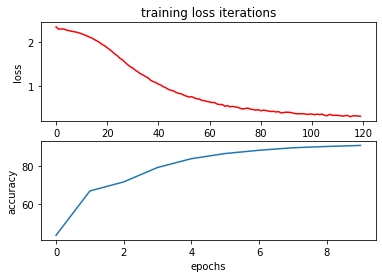

In [54]:

training_results=train(model,criterion,optimizer,trainloader,validationloader,10)
plot_accuracy_loss(training_results)


Finally test the trained model to check the accuracy on shuffled and entirely different dataset (the testset) for better judgement and to display the first few misclassified samples:

In [55]:

model.eval() 
correct=0

for i, (x,y) in enumerate(testloader):
    
      # Put each image into a vector
      x = x.view(-1, 28*28)
    
      # Do the forward pass and get the predictions
      z = model(x)
      _,prediction = torch.max(z,1)
      correct += (prediction == y).sum().item()
print('The testing set accuracy of the network is: %d %%' % (100 * correct / len(testset)))

The testing set accuracy of the network is: 91 %


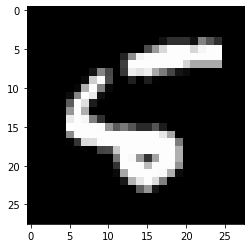

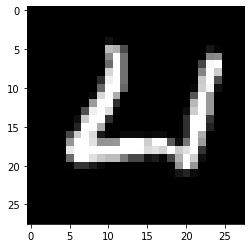

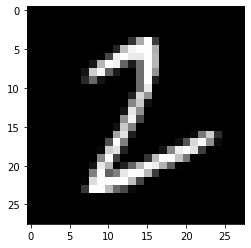

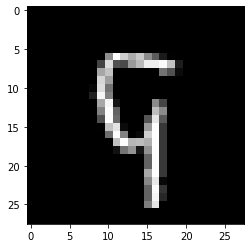

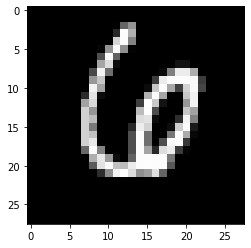

In [56]:

count = 0
for x, y in testset:
    z = model(x.reshape(-1, 28 * 28))
    _,prediction = torch.max(z, 1)
    if (prediction != y):
        show_data(x)
        count += 1
    if count >= 5:
        break

Hence, to conclude the model was well trained since it produced a good accuracy on the validation and test datasets and can be deployed to predict the digits with a decent accuracy as the displayed misclassifications were tough to classify even for a normal person